# Lab05_111062678

In [68]:
import pandas as pd
import numpy as np

In [69]:
# download the dataset
import urllib.request

urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test_submit = pd.read_csv('./data/X_test.csv') # No y_test

In [70]:
print(X_train.shape)
print(X_train.columns)
print(y_train.columns)

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


In [71]:
X_train.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


In [72]:
X_test_submit.head()

,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,3,595,11.3,1,1.8,3.9,2,0.3
1,2,530,11.0,0,1.0,24.3,3,6.3
2,1,221,21.3,2,1.9,3.5,2,11.5
3,3,442,9.0,0,0.6,2.4,2,3.4
4,1,634,16.1,0,0.8,4.2,2,1.6


In [73]:
y_train.head()

,FGM
0,0
1,1
2,1
3,1
4,1


# Preprocessing

### Standardlization

In [74]:
from sklearn.preprocessing import StandardScaler

X = X_train.iloc[:, ].values
y = y_train.values

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)  #x train standardization
X_test_std = sc_x.fit_transform(X_test_submit) #x test standardization

### 1.Use all features to train any linear model in scikit-learn and try different hyperparameters 
### (ex. different degree, complexity). Show their performances.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error

max_degree = 6
y = y.ravel() #switch to 1D array

mse_train = []
mse_test = []

for d in range(1, max_degree):
    
    poly = PolynomialFeatures(degree=d)
    
    X_poly = poly.fit_transform(X_std)
    
    #Split into training, testing and validation set
    X_train, X_test, y_train, y_test = train_test_split(
            X_poly, y, test_size=0.3, random_state=0)
    X_train, X_valid, y_train, y_valid = train_test_split(
            X_train, y_train, test_size=0.3, random_state=0)
    
    #training set: X_train, y_train
    #testing set: X_test, y_test
    #validation set: X_valid, y_valid
    #summited testing set: X_test     
    
    ridge_classifier = RidgeClassifier()
    ridge_classifier.fit(X_train, y_train)
    
    y_train_pred = ridge_classifier.predict(X_train)
    y_valid_pred = ridge_classifier.predict(X_valid)
    y_test_pred = ridge_classifier.predict(X_test)
    
    print('MSE train: %f, valid: %f, test: %f' % (
                    mean_squared_error(y_train, y_train_pred),
                    mean_squared_error(y_valid, y_valid_pred),
                    mean_squared_error(y_test, y_test_pred)
    
                    ))
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    

MSE train: 0.389033, valid: 0.398656, test: 0.391472
MSE train: 0.380608, valid: 0.386661, test: 0.385913
MSE train: 0.379108, valid: 0.386773, test: 0.386224
MSE train: 0.375919, valid: 0.385995, test: 0.389761
MSE train: 0.366066, valid: 0.393159, test: 0.394542


### 2.Select 1 setting (model + hyperparameters) and plot the error curve to show that the setting you selected isn't over-fit.

#### RidgeClassifier + degree2 has the best performence 

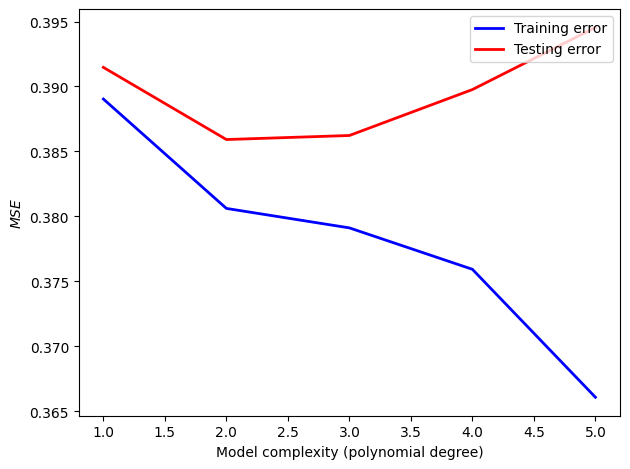

In [76]:
%matplotlib inline
from pylab import *

plt.plot(range(1, max_degree), mse_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), mse_test, label = 'Testing error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$MSE$')
plt.tight_layout()
# plt.savefig('./output/fig-error-curve.png', dpi=300)
plt.show()

### 3.Use any method to choose the best 3 features that can best aid the model's prediction. Explain how you find it.
#### Using LASSO for Feature Selection

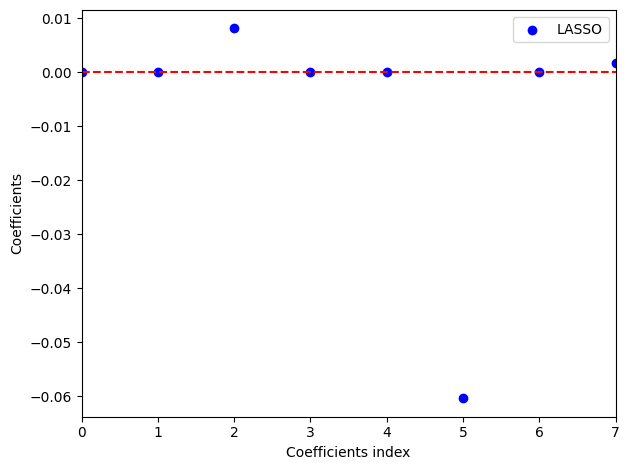

Selected attributes: ['SHOT_CLOCK' 'SHOT_DIST' 'CLOSE_DEF_DIST']
(array([2, 5, 7], dtype=int64),)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

y = y.ravel() #switch to 1D array

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_std)

X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=0)

var_num = X_train.shape[1]

lr_lasso = Lasso(alpha = 0.03)
lr_lasso.fit(X_train, y_train)
# lr_ridge = Ridge(alpha = 1)
# lr_ridge.fit(X_train, y_train)

plt.scatter(range(var_num),lr_lasso.coef_, label = 'LASSO', color = 'blue')
# plt.scatter(range(var_num),lr_ridge.coef_, label = 'Ridge', color = 'green')
plt.hlines(y=0, xmin=0, xmax=var_num-1, color='red', linestyle ='--')
plt.xlim(0,7)
plt.legend(loc = 'upper right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()

epsilon = 1e-4
idxs = np.where(abs(lr_lasso.coef_) > epsilon)
idxs
x = pd.read_csv('./data/X_train.csv');
print('Selected attributes: {}'.format(x.columns.values[idxs]))
print(idxs)
# print(y_test[:100])

### 4.Train the model selected in 2. with the only 3 features selected in 3., and present the training error.

In [ ]:
max_degree = 6
y = y.ravel() #switch to 1D array


X_std_feature_selection = X_std[[2,5,7]]
X_std_feature_selection


poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X_std)

#Split into training, testing set
X_train, X_test, y_train, y_test = train_test_split(
        X_poly, y, test_size=0.3, random_state=0)


#training set: X_train, y_train
#testing set: X_test, y_test
#summited testing set: X_test_submit     

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)

y_train_pred = ridge_classifier.predict(X_train)
y_test_pred = ridge_classifier.predict(X_test)

print('MSE train: %f,test: %f' % (
                mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)

                ))

 


### 5.Export the predictions of the model trained in 4. for X_test (follow the format of y_train.csv).

In [ ]:
X_poly_submit = poly.fit_transform(X_test_std)
y_test_pred_submit = ridge_classifier.predict(X_poly_submit)

y_test_pred_submit[:100]
df = pd.DataFrame({'FGM': y_test_pred_submit})
# df
csv_file_name = "data.csv"
# df.to_csv("Lab05_111062678_y_pred.csv", index=False)  //export prediction
# y_test_pred_submit

### 6.A brief report of what you have done in this assignment.

#### Preprocessing:
 做weight decay前先將data set 做standardlization.

#### 1. Use all features to train any linear model in scikit-learn and try different hyperparameters(ex. different degree, complexity). Show their performances.

 (1) 因為要觀察在調整不同超參數的情況下model的performence，因此我先將data set切分為 training, testing and validation set
 
 (2) 我選擇訓練的model為RidgeClassifier，分別帶入不同的degree(1~5)分別下去train並且觀察他的mean square error

#### 2. Select 1 setting (model + hyperparameters) and plot the error curve to show that the setting you selected isn't over-fit.

 (1) 將1.的每個不同complexity下的model train出來的結果繪製成error curve的圖，可以觀察到在degree為2時的model表現最好，在degree為1時underfiting，在degree大於2時training error大幅降低，但testing error反而升高，已經有overfitting的情況發生。

#### 3. Use any method to choose the best 3 features that can best aid the model's prediction. Explain how you find it.

 (1) 利用Lasso做feature selection，分別帶入不同Alpha值並觀察那些feature的coefficients值，並挑選出三個非0的feature作為接下來的training set，分別為'SHOT_CLOCK'、 'SHOT_DIST'、 'CLOSE_DEF_DIST'。

#### 4. Train the model selected in 2. with the only 3 features selected in 3., and present the training error.

 (1) 提取3.中做的feature selection的結果( 'SHOT_CLOCK'、 'SHOT_DIST'、 'CLOSE_DEF_DIST' )到data set中
 
 (2) 將data set 切分為training、testing set
 
 (3) 一樣利用RidgeClassifier來做training，並得出training set 和testing set的mean_squared_error
 
 (4) 可以發現testing set的prediction的mean_squared_error下降
